---
title: "Confirming to statistical assumptions"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-19"
categories: [python, datacamp, feature engineering, machine learning, statistical analysis]
image: "conformingStatisticalAssumptions.png"

---

# Confirming to statistical assumptions

In this chapter, we'll look at how the underlying distribution of our data affects our machine learning pipeline. We'll learn how to deal with skewed data and how outliers can hurt our analysis

This **Confirming to statistical assumptions** is part of [Datacamp course: Feature engineering for machine learning in Python]

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Feature engineering for machine learning in Python]: (https://campus.datacamp.com/courses/feature-engineering-for-machine-learning-in-python)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
so_survey_df = pd.read_csv('dataset/Combined_DS_v10.csv')
so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


## What does your data look like? (I)

So far, all you've done is create new features and deal with data issues. You can also use feature engineering to make the most of the data you already have and use it more effectively when creating machine learning models.
Many algorithms assume your data is normally distributed, or at least that all your columns are the same size. In many cases, this won't be the case, for example one feature might be measured in dollars, while another might be measured in years.

AttributeError: module 'matplotlib' has no attribute 'show'

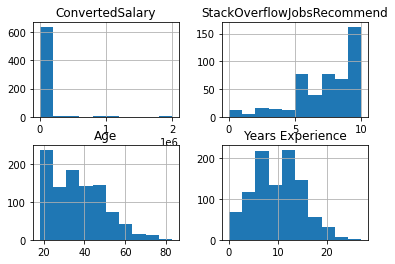

In [6]:
so_survey_df.hist()
plt.show()

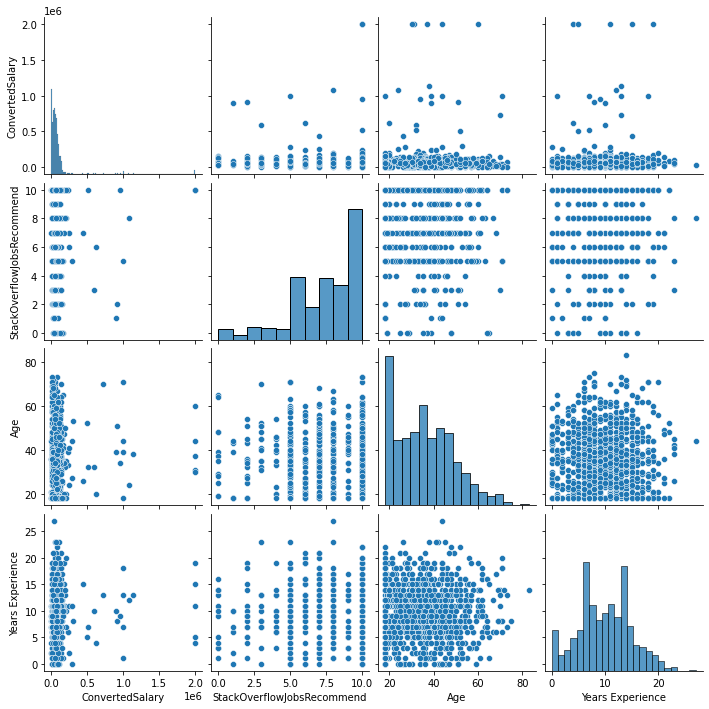

In [8]:
sns.pairplot(so_survey_df)

In [9]:
so_survey_df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,6.650000e+02,487.000000,999.000000,999.000000
mean,9.256517e+04,7.061602,36.003003,9.961962
std,2.091344e+05,2.621591,13.255127,4.878129
min,0.000000e+00,0.000000,18.000000,0.000000
25%,2.755000e+04,5.000000,25.000000,7.000000
50%,5.556200e+04,7.000000,35.000000,10.000000
75%,8.823800e+04,10.000000,45.000000,13.000000
max,2.000000e+06,10.000000,83.000000,27.000000


In [10]:
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]

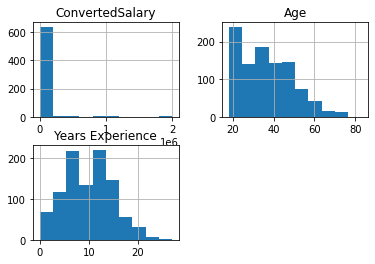

In [12]:
so_numeric_df.hist();

AttributeError: module 'matplotlib' has no attribute 'show'

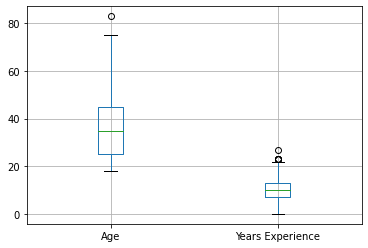

In [15]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

<AxesSubplot:>

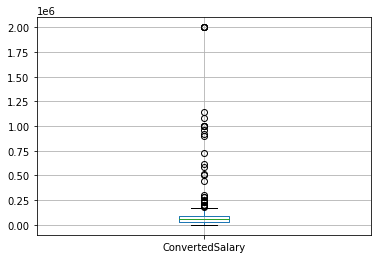

In [13]:
so_numeric_df[['ConvertedSalary']].boxplot()

## What does your data look like? (II)

In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.

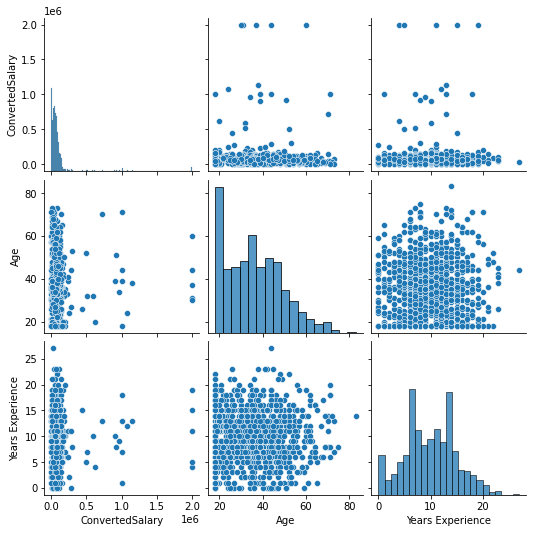

In [17]:
# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

In [18]:
print(so_numeric_df.describe())

       ConvertedSalary         Age  Years Experience
count     6.650000e+02  999.000000        999.000000
mean      9.256517e+04   36.003003          9.961962
std       2.091344e+05   13.255127          4.878129
min       0.000000e+00   18.000000          0.000000
25%       2.755000e+04   25.000000          7.000000
50%       5.556200e+04   35.000000         10.000000
75%       8.823800e+04   45.000000         13.000000
max       2.000000e+06   83.000000         27.000000


## Normalization

In normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.
When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


C:\Users\dghr201\AppData\Local\Temp\ipykernel_38976\3232005792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])


## Standardization

While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.

In [21]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


C:\Users\dghr201\AppData\Local\Temp\ipykernel_38976\2924426930.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])


## Log transformation

Above you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise you will use a log transform on the ConvertedSalary column in the so_numeric_df DataFrame as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail

C:\Users\dghr201\AppData\Local\Temp\ipykernel_38976\3655555814.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])


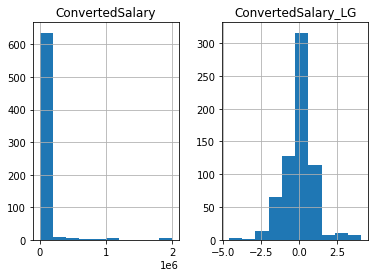

In [22]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

## Excluding outliers

Removing outliers on the basis of percentages

By removing a certain percentage of the largest and/or smallest values in the column, you can ensure that a small portion of data has no adverse effect. A mask can be used to trim the data using the relevant quantile. It is particularly useful if you are concerned that the highest values in your dataset should be avoided. Even if there are no outliers in the dataset, using this approach will still remove the same top N percentage.

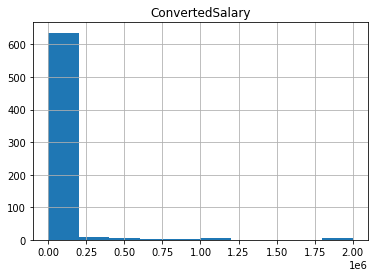

<Figure size 432x288 with 0 Axes>

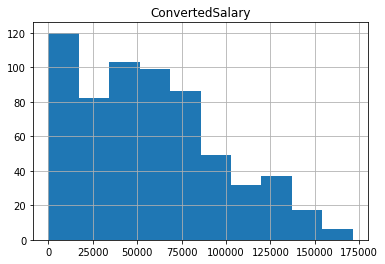

In [23]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

## Removing statistical outliers

While removing the top N% of your data is useful for ensuring that extremely spurious points are removed, it also has the disadvantage of always removing the same proportion of points, regardless of whether your data is accurate. If the data sits more than three standard deviations from the mean, it is commonly removed. By calculating the mean and standard deviation of the relevant column and applying these bounds as a mask to the DataFrame, you can achieve this goal. This method ensures that only data that are genuinely different from the rest is removed, and will remove fewer points if the data are close together.

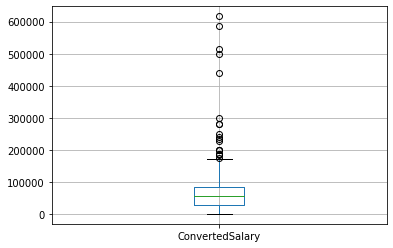

In [24]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

## Data transformation and scaling

Scaling only with training data?

Using data that you won't have access to when evaluating your model

Testing transformations (I)

Scalers have been created based on columns, then applied to the same data. Machine learning models are usually built on historic data (train set) and applied to new unseen data (test set). Ensure that training and test data are scaled the same way. Practically, you train the scaler on the train set, then apply it to the test set. Never retrain a scaler on the test set.

In [25]:
from sklearn.model_selection import train_test_split

so_numeric_df = pd.read_csv('dataset/Combined_DS_v10.csv')[['ConvertedSalary', 'Age', 'Years Experience']]

so_train_numeric, so_test_numeric = train_test_split(so_numeric_df, test_size=0.3)

In [26]:
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
so_test_numeric[['Age', 'Age_ss']].head()

,Age,Age_ss
977,18,-1.339442
719,55,1.425282
656,51,1.126393
402,69,2.471394
643,48,0.902226


## Train and testing transformations (II)

Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

In [27]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]